**Question 1**

---

Consider a dataset    that contains only two observations  𝐱1=(1,1)  and  𝐱2=(−1,−1) . Suppose that the class of the first observation is  𝑦1=0  and that the class of the second observation is  𝑦2=1 . How would a 1-nearest neighbour classifier based on the Euclidean distance classify the observation  𝐱=(2,3) ?

**Solution**

---



A 1-nearest neighbour classifier classifies a new observation x as yi whenever the observation xi is the closest observation to the new obserbation x in the dataset D. In our instance, if we look at the observation in a xy plane, the new observation x(2,3) is closer to observation x1(1,1), which belongs to class y1 = 0. So, the class for x will be y1=0.

**Question 2**

---

Consider a dataset    that only contains observations of two different classes. Explain why a  𝑘 -nearest neighbour classifier does not need a tie-breaking policy when  𝑘  is odd.

**Solution**

---

Knn classifies a new observation x as y if the majority of the K-nearest neighbours of x in the dataset D belongs to class y. Tie may occur when two or more points are equidistant from the unclassified observation x, making it difficult to select which neighbors are included. So, that’s why if we have an odd K (assuming that the number of classes is even), we do not need a tie-braking policy.

**Question 3**

---

Explain why a classifier that obtains an accuracy of  99.9%  can be terrible for some datasets.

**Solution**

---


 A classifier that obtains an accuracy of 99.9% can be terrible, when applied on class imbalanced datasets. In classification imbalanced problems, the distribution of observations in the training dataset across the classes is not equal. When the class distribution is not skewed, accuracy is a useful metric. When there is a significant skew in the class distributions, accuracy can become an unreliable measure of model performance. So, if classification accuracy is used on imbalanced class datasets, it can mislead someone into thinking that this model has excellent performance.

**Question 4**

---

Consider a classifier tasked with predicting whether an observation belongs to class  𝑦  (positive class). Suppose that this classifier has precision  1.0  and recall  0.1  on a test dataset. If this classifier predicts that an observation does not belong to class  𝑦 , should it be trusted? Should it be trusted if it predicts that the observation belongs to class  𝑦 ?

**Solution**

---

If this classifier predicts that an observation does not belong to class y, should not be trusted, because it has low recall (0.1). However, it should be trusted if it predicts that the observation belongs to class y, because it has high precision (1.0).

**Question 5**

---


Train a support vector machine classifier using the same training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class SVC from sklearn.svm.

**Solution**

---


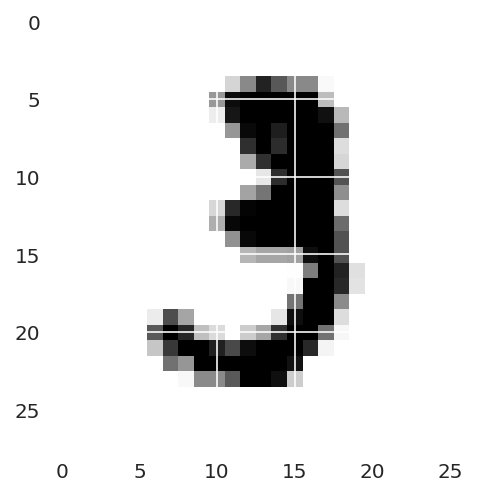

Observation index: 10. Class: 3.


In [ ]:
# Configuring the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = gzip.open('mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]

i = 10
plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('Observation index: {0}. Class: {1}.'.format(i, y[i]))

In [ ]:
from sklearn.model_selection import train_test_split

#train_test_split method that allows to divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.svm import SVC
svclassifier = SVC()

#fit method of SVC class is called to train the algorithm on the training data
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('Test dataset accuracy: {0}.'.format(svclassifier.score(X_test, y_test)))

Test dataset accuracy: 0.9275.


**Question 6**

---


Using the same training dataset, employ GridSearchCV to find the best hyperparameter settings based on 5-fold cross-validation for a RandomForestClassifier. Consider n_estimators  ∈{50,100,200}  and max_features  ∈{0.1,0.25} . Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset. 

**Solution**

---


In [ ]:
from sklearn import set_config 
set_config(print_changed_only=False)
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

#train_test_split method that allows to divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rfc = RandomForestClassifier()

#set the n_estimators and max_features
parameters = {'n_estimators' : [50,100,200], 'max_features' : [0.1,0.25]}

#GridSearchCV to find the best hyperparameter settings based on 5 -fold cross-validation
rfc_cv = GridSearchCV(rfc, parameters, cv=5)

#fit method of SVC class is called to train the algorithm on the training data
rfc_cv.fit(X_train, y_train)
print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False).
Test dataset accuracy of best hyperparameter setting: 0.9125.


**Question 7**

---

The function ``kmeans_update`` presented below is part of an implementation of the k-means clustering algorithm. The variable ``X`` is a matrix (numpy array) where each row corresponds to an observation. Explain in detail each line of this function. You can refer to each (non-empty) line by a number between 1 and 6. 
```python
def kmeans_update(X, cluster_centers):
    y_pred = np.argmin(cdist(X, cluster_centers), axis=1)
        
    next_cluster_centers = np.zeros(cluster_centers.shape)
    for i in range(len(next_cluster_centers)):
        next_cluster_centers[i] = X[y_pred == i].mean(axis=0)
        
    return y_pred, next_cluster_centers
```

**Solution**

---

Line 1: Define function ‘kmeans_update’.

Line 2: ‘y_pred’ variable is equal to a function that calculates the Euclidean distance between X of Matrix X and ‘cluster_centers’ using ‘cdist’ and return the index of the minimum value along axis 1 using ‘np_argmin’. Specifically, each observation x is assigned to the closest cluster center.

Line 3: Declare variable ‘next_cluster_centers’ which is equal to a new array of cluster_center.shape (rows and columns of cluster_center) filled with zeros.

Line 4: Loop through the length of next_cluster_centers.
 
Line 5: Each next_cluster_center is moved to the mean of the observations assigned to it. 

Line 6: Return the closest points to the cluster center and next_cluster_center values.